<a href="https://colab.research.google.com/github/RockhoRockho/Deep_Learning_Tensorflow/blob/main/20211118_3_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EC%99%80_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow / Keras**

* 텐서플로우와 케라스는 ML 모델 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리
* 케라스는 사용자가 텐서플로우를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공
* 텐서플로우 2.X에서는 케라스를 딥러닝의 공식 API로 채택하였고, 텐서플로우 내의 하나의 프레임워크로 개발되고 있음

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


### **1. Tensor**

Tensor는 multi-dimensional array를 나타내는 말로, Tensorflow의 기본 data type

In [3]:
hello = tf.constant([3, 3], dtype=tf.float32)
print(hello)

hello = tf.constant('Hello World!')
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)
tf.Tensor(b'Hello World!', shape=(), dtype=string)


In [4]:
# 상수형 tensor는 아래와 같이 만들 수 있음
# 값을 출력하면 tensor의 값과 함께, shape와 내부의 data type을 함께 볼 수 있음
# 버전 2부터 시작된 EagerTensor로 가능
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x)) # <class 'tensorflow.python.framework.ops.EagerTensor'>

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x_np = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
x_list = [[1.0, 2.0], 
          [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [7]:
# numpy의 ndarray, python의 list를 tensor로 바꿈
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [8]:
# tensor를 numpy ndarray로 바꿈
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [9]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [10]:
# 텐서플로우의 함수(넘파이와 비슷)
a = tf.ones((2, 3))
print(a)
b = tf.zeros((2, 3))
print(b)
c = tf.fill((2, 2), 2)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [11]:
# shape와 dtype이 복사
d = tf.zeros_like(c)
print(d)
e = tf.ones_like(c)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [12]:
f = tf.eye(5)
print(f)

tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)


In [13]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [14]:
h = tf.random.uniform((2, 2)) # np.rand
print(h)
i = tf.random.normal((2, 2)) # np.randn
print(i)

tf.Tensor(
[[0.36966074 0.1394105 ]
 [0.3436103  0.97651017]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.0767851  -0.87749285]
 [ 0.8795688  -0.7934203 ]], shape=(2, 2), dtype=float32)


### **2. Tensor의 속성**

In [15]:
tensor = tf.random.normal((3, 4))

print(f"Shape : {tensor.shape}")
print(f"DataType : {tensor.dtype}")

Shape : (3, 4)
DataType : <dtype: 'float32'>


In [16]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape : {tensor.shape}")
print(f"DataType : {tensor.dtype}")

Shape : (4, 3)
DataType : <dtype: 'int32'>


### **3. Variable**

* Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서
* 딥러닝에서는 학습해야하는 가중치(weight, bias)들을 variable로 생성

In [17]:
tensor = tf.ones((3, 4))
print(tensor)

tensor[0, 0] = 2 # 파이썬의 튜플과 비슷

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: ignored

In [18]:
# variable 만들기, 값 변경
variable = tf.Variable(tensor)
print(variable)

variable[0, 0].assign(2) # assign으로 값을 바꿀 수 있음
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [19]:
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.38148442,  1.038251  ],
       [-0.01326116,  0.8545231 ]], dtype=float32)>


In [20]:
# variable은 ".assign(value)", ".assing_add(increment)", ".assign_sub(decrement)"와 같은 메소드를
# 사용해서 variable의 값을 갱신
new_value = tf.random.normal(shape=(2, 2))
print(new_value)
weight.assign(new_value)
print(weight)

added_value = tf.ones(shape=(2, 2))
weight.assign_sub(added_value)
print(weight)

tf.Tensor(
[[ 0.23519382 -1.4563432 ]
 [ 1.0550984  -1.4570295 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.23519382, -1.4563432 ],
       [ 1.0550984 , -1.4570295 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.76480615, -2.4563432 ],
       [ 0.05509841, -2.4570293 ]], dtype=float32)>


### **4. Indexing과 Slicing**

In [21]:
a = tf.range(1, 13)
print(a)

a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12], shape=(12,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [22]:
# indexing -> 인덱싱을 하게되면 차원이 감소하게 됨
print(a[1])
print(a[0, -1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [23]:
# slicing -> 슬라이싱은 차원이 유지됨
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### **5. Transpose(차원 바꾸기)**

In [24]:
a = tf.range(16)
print(a)
a = tf.reshape(a, (2, 2, -1)) # -1은 자동으로 만들라는 뜻
print(a)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [25]:
b = tf.transpose(a, (2, 0, 1)) # a, 축번호
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### **6. Tensor 연산**

In [26]:
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [27]:
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))
print('*' * 50)
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
**************************************************
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [28]:
z = tf.range(1, 11)
print(z)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [29]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [66]:
sum1 = tf.reduce_sum(z, axis=0)
print(sum1)
sum2 = tf.reduce_sum(z, axis=1)
print(sum2)
sum3 = tf.reduce_sum(z, axis=-1) # -1 : 마지막
print(sum3)
z_ = [[[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 10]],
      [[11, 12, 13, 14 ,15],
       [16, 17, 18, 19, 20]]]
sum4 = tf.reduce_sum(z_, axis=2)
print(sum4)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor(
[[15 40]
 [65 90]], shape=(2, 2), dtype=int32)


In [31]:
concat = tf.concat([z, z], axis=0)
print(concat)
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


### **7. TensorFlow / Keras 예제**

In [32]:
# MNIST 데이터셋 다운로드
mnist = keras.datasets.mnist # 손글씨 숫자 이미지 데이터
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [33]:
# Model 생성, 컴파일
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.9160
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9840
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0694 

[0.0693652555346489, 0.9815999865531921]

In [35]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

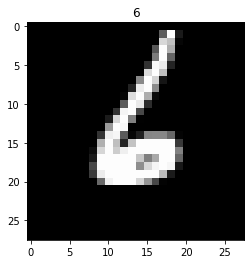

In [36]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [39]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('업로드 파일 이름 {name}, 용량 {length} bytes'.format(name=fn, length=uploaded[fn]))

Saving image.png to image (1).png
업로드 파일 이름 image.png, 용량 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00<\x00\x00\x00<\x08\x02\x00\x00\x00\xb5\x9eN%\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x01\xe8IDAThC\xed\x971\x0e\x830\x0cE\x19\x19;v\xecQz\x0c\xc6\x8e\x8c\xdc\x82#t\xe4\x18=\x1ack\x11\x0bYI 6\xb1-U\xca\xdb\x1ah\xf2\xf88`\xba\xef\x1f\xd2\xa4\xbdh\xd2^TI/\xcb\xf2x<\xba\x04\x18\x84Cx\x92\x01W\xa4?\x9fO\xd6\x95\xd2\xf7\xbd\x9d\xb7X\x1a\x8co\xb7\x1b\xaa\x950\x8a\\,}\xbf\xdf\xd1hc\x18\x86u]\xf1\xd8\xc6<\xcfxl\xc3"r\x99\xf4\xfb\xfdF\x97\xae\x1b\xc7\x11G\x13\xac\xbd\x05\xd2\xb40 `\x1c=\x86\xaa\xebz\x0b\xa4iaD%qD\xe4\x8d\xa3\xd5\x08\xa4a\xd5\xb0\xfcIa\xa4Po\xad\xb0\x05\xd2ay\x91q`\xbfZ\xad\xb0e\x1b\xf1\x1a4l\x1c\xaa\xc3C\x1a@\xe5&m\x0e*7i[\xe0\xad\x84\xca\x7f$M\xdfJ8TG\xd5,{\x8fz\xde\xcd\x05]\xe0\xc23>K\x954\xed\xaa\x8f\xba\x0b\xdac\xe1P5U\x13\xd1\xb7\x06\x90\xf5\xdek\x83

/content/image2.png


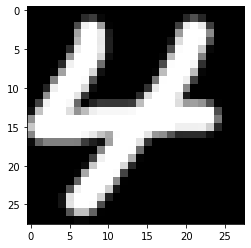

In [53]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image2.png')
print(img_path)
cur_img = Image.open(img_path)
# 28x28 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try: 
    image = np.mean(image, axis=2)
except:
    pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

In [54]:
# shape을 변경하여 학습된 model에 넣고 겨과 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이즈
print(model.predict(image))

print('model이 예측한 값은 {} 입니다.'.format(np.argmax(model.predict(image), -1)))

[[3.5750087e-09 1.3050806e-11 2.5204375e-13 6.1355525e-09 9.9941719e-01
  5.7071481e-14 5.8061234e-04 2.3149817e-06 1.2714013e-13 2.0176005e-11]]
model이 예측한 값은 [4] 입니다.
